# Выделить и посчитать клетки крови

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

from ipywidgets import interact

# Функция вывода изображения

In [2]:
def showImage(images, size = 15, colorMap = 'gray'):
    countImages = len(images)
    #size *= countImages
    pic_box = plt.figure(figsize=(size, size * countImages))
    for i, image in enumerate(images):
        pic_box.add_subplot(countImages, 2, i+1)
        plt.imshow(image)
        plt.set_cmap(colorMap)
        plt.subplots_adjust(wspace=0, hspace=0.1)
        plt.axis('off')
    plt.show()

In [3]:
image_srs = cv2.imread('1.png')
image_gray = cv2.cvtColor(image_srs,cv2.COLOR_BGR2GRAY)

# Исходное изображение и изображение в серых тонах

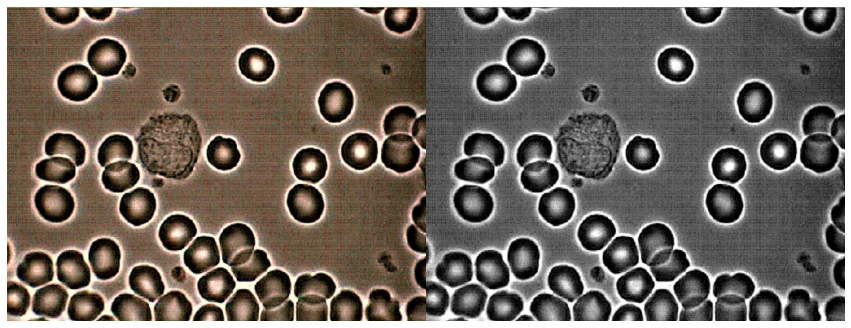

In [4]:
showImage([image_srs, image_gray])

# Преобразования Хафа

In [5]:
image_blured = cv2.GaussianBlur(image_gray, (25,25), 0)
print(type(image_blured), image_blured.shape)

<class 'numpy.ndarray'> (750, 1000)


In [14]:
circles = cv2.HoughCircles(image_blured, cv2.HOUGH_GRADIENT, 2, 28, param1=28, param2=21, minRadius=49, maxRadius=50)

Найдено клеток:  37


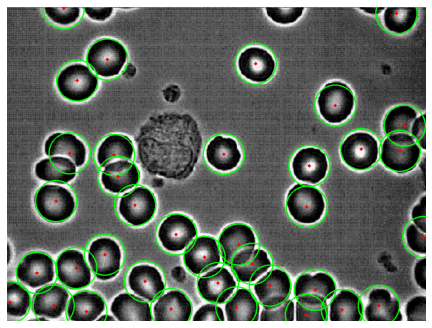

In [16]:
circles = np.uint16(np.around(circles))
cimg = cv2.cvtColor(image_gray,cv2.COLOR_GRAY2BGR)
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0),2)
    # draw the center of the circle
    cv2.circle(cimg, (i[0], i[1]), 2, (255, 0, 0), 3)
print("Найдено клеток: ", circles[0].shape[0])
showImage([cimg])